In [1]:
import matplotlib,networkx,sys,seaborn,plotly,pandas
print('python的版本为：',sys.version)
print('networkx模块的版本为：',networkx.__version__)
print('matplotlib模块的版本为：',matplotlib.__version__)
print('pandas模块的版本为：',pandas.__version__)
print('seaborn模块的版本为：',seaborn.__version__)
print('plotly模块的版本为：',plotly.__version__)

python的版本为： 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
networkx模块的版本为： 2.8.7
matplotlib模块的版本为： 3.3.4
pandas模块的版本为： 1.2.4
seaborn模块的版本为： 0.11.1
plotly模块的版本为： 5.17.0


## 不指定画布和布局，系统会默认生成图像

网络中的信息，可以先创建一个空白图后添加连线与节点信息，也可以在创建图形的同时就把信息填充完整

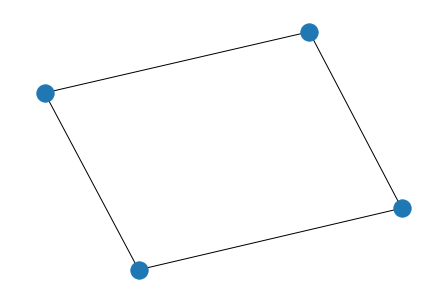

In [2]:
import networkx as nx

G = nx.Graph()
G.add_edges_from([(1,2),(2,3),(3,4),(4,1)])
nx.draw(G)

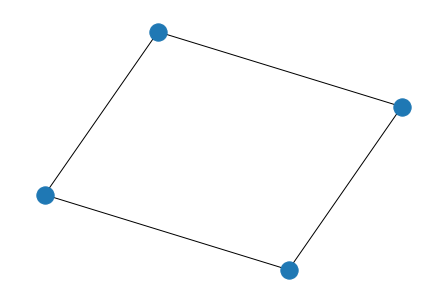

In [3]:
G = nx.Graph([(1,2),(2,3),(3,4),(4,1)])
nx.draw(G)

## 一个完整的网络图绘制的流程:
    
    （1）设置画布大小
    （2）丰富网络图中信息
    （3）设置布局（包含节点布局和网络位于画布的布局）

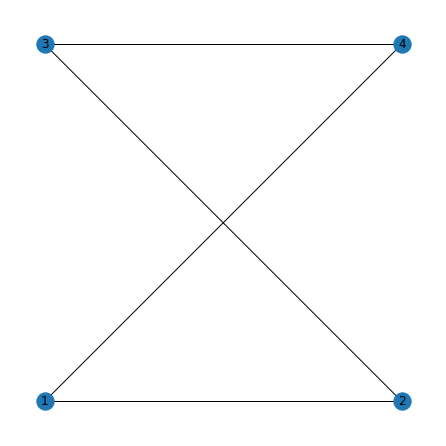

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))

G = nx.Graph()
G.add_edges_from([(1,2),(2,3),(3,4),(4,1)])

pos = {1: (0, 0), 2: (1, 0), 3: (0, 1), 4: (1, 1)} 
nx.draw(G,pos,with_labels = True)

除了直接使用`nx.draw()`绘制图形外，还可以使用拥有更多绘图参数的`nx.draw_networkx()`方法，此方法默认显示节点标签和坐标轴信息（即画布）

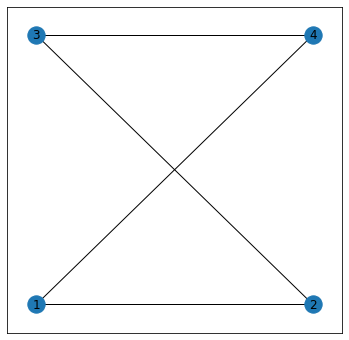

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))

G = nx.Graph()
G.add_edges_from([(1,2),(2,3),(3,4),(4,1)])

pos = {1: (0, 0), 2: (1, 0), 3: (0, 1), 4: (1, 1)}
nx.draw_networkx(G,pos)

在`nx.draw_networkx()`基础上还有一些针对具体的节点，连线，便签，布局等方面的快速绘制的方法，比如：

    （1）nx.draw_networkx_nodes()
    （2）nx.draw_networkx_edges()
    （3）nx.draw_networkx_labels()
    （4）nx.draw_networkx_edge_labels()
    （5）nx.draw_spring()
        ...

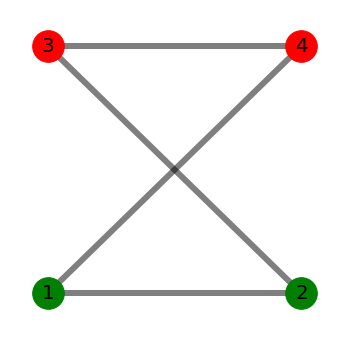

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))

G = nx.Graph([(1,2),(2,3),(3,4),(4,1)])
pos = {1: (0, 0), 2: (1, 0), 3: (0, 1), 4: (1, 1)}
nx.draw_networkx_nodes(G,pos, node_size=1000, nodelist=[1, 2], node_color="green")
nx.draw_networkx_nodes(G,pos, node_size=1000, nodelist=[3, 4], node_color="red")

nx.draw_networkx_edges(G,pos,alpha=0.5, width=6)
nx.draw_networkx_labels(G,pos,font_size=20)

ax = plt.gca()
ax.margins(0.1) #此处是设置图像距离画布的之间的布局
plt.axis("off")
plt.show()

nx模块中有一些可以直接拿来用的节点布局算法

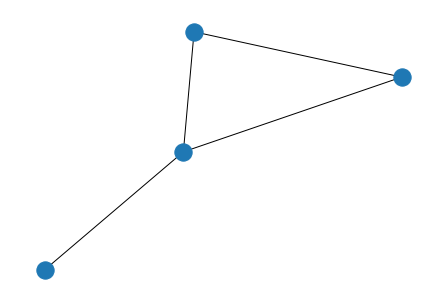

In [7]:
G = nx.Graph([(1,2),(2,3),(3,4),(4,2)])
pos = nx.spring_layout(G)
nx.draw(G,pos)

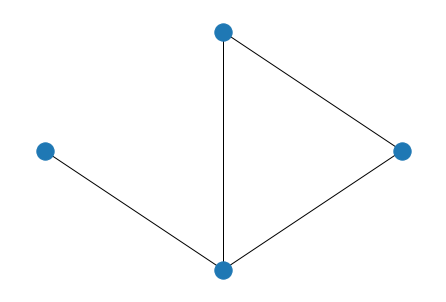

In [8]:
G = nx.Graph([(1,2),(2,3),(3,4),(4,2)])
pos = nx.shell_layout(G)
nx.draw(G,pos)

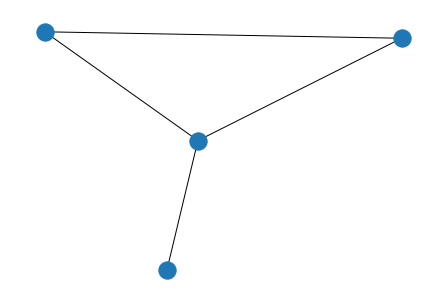

In [9]:
G = nx.Graph([(1,2),(2,3),(3,4),(4,2)])
nx.draw_spring(G)

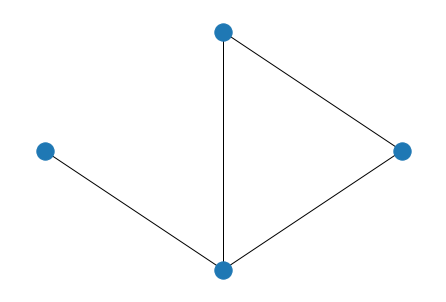

In [10]:
G = nx.Graph([(1,2),(2,3),(3,4),(4,2)])
nx.draw_shell(G)

# 网络图中常见的统计量

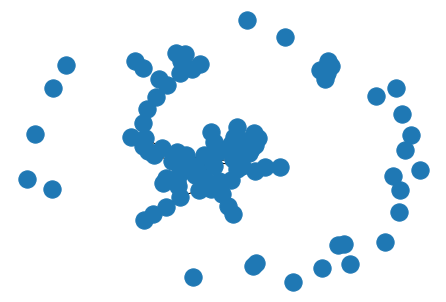

In [11]:
G = nx.binomial_graph(100, 0.02,seed=24)

nx.draw(G)

In [12]:
len(G.nodes())

100

In [13]:
len(G.edges())

85

In [14]:
len(list(nx.isolates(G)))

21

In [15]:
len(list(nx.selfloop_edges(G)))

0

In [16]:
nx.density(G)

0.01717171717171717

In [17]:
nx.transitivity(G)

0.020689655172413793

In [18]:
def graphStats(G):
    basic_info = f'''
    Nodes: {len(G.nodes())}
    Edges: {len(G.edges())}
    Isolates: {len(list(nx.isolates(G)))}
    Self loops: {len(list(nx.selfloop_edges(G)))}
    Density: {nx.density(G):.8f}
    Transitivity: {nx.transitivity(G):.8f}
    '''
    return basic_info

print(graphStats(G))


    Nodes: 100
    Edges: 85
    Isolates: 21
    Self loops: 0
    Density: 0.01717172
    Transitivity: 0.02068966
    


## 如何获取群体中最大的子群

In [19]:
print([c for c in nx.connected_components(G)])

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 20, 23, 25, 26, 27, 28, 29, 31, 32, 33, 35, 37, 39, 40, 47, 48, 50, 51, 52, 54, 56, 59, 60, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 75, 77, 79, 80, 81, 82, 85, 86, 88, 89, 91, 92, 93, 94, 95, 96, 97, 99}, {34, 38, 11, 44, 84}, {17}, {18}, {74, 19}, {21}, {22}, {24}, {30}, {36}, {41}, {42, 46}, {43}, {45}, {49}, {76, 53}, {55}, {57}, {58}, {61}, {65}, {78}, {83}, {87}, {90}, {98}]


In [20]:
print([(len(c),c) for c in nx.connected_components(G)])

[(68, {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 20, 23, 25, 26, 27, 28, 29, 31, 32, 33, 35, 37, 39, 40, 47, 48, 50, 51, 52, 54, 56, 59, 60, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 75, 77, 79, 80, 81, 82, 85, 86, 88, 89, 91, 92, 93, 94, 95, 96, 97, 99}), (5, {34, 38, 11, 44, 84}), (1, {17}), (1, {18}), (2, {74, 19}), (1, {21}), (1, {22}), (1, {24}), (1, {30}), (1, {36}), (1, {41}), (2, {42, 46}), (1, {43}), (1, {45}), (1, {49}), (2, {76, 53}), (1, {55}), (1, {57}), (1, {58}), (1, {61}), (1, {65}), (1, {78}), (1, {83}), (1, {87}), (1, {90}), (1, {98})]


In [21]:
print(max([c for c in nx.connected_components(G)],key=len))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 20, 23, 25, 26, 27, 28, 29, 31, 32, 33, 35, 37, 39, 40, 47, 48, 50, 51, 52, 54, 56, 59, 60, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 75, 77, 79, 80, 81, 82, 85, 86, 88, 89, 91, 92, 93, 94, 95, 96, 97, 99}


In [22]:
H = max((G.subgraph(c) for c in nx.connected_components(G)),key=len)

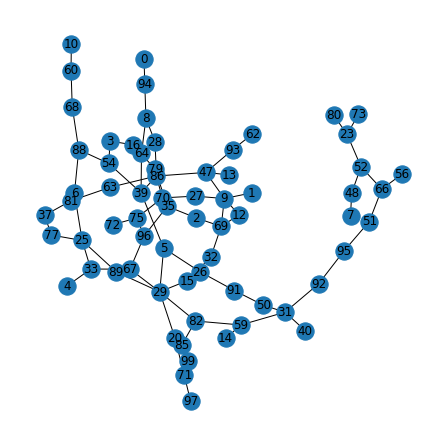

In [23]:
plt.figure(figsize=(6,6))
nx.draw_spring(H,with_labels=True)

In [24]:
print(list(nx.isolates(G)))

[17, 18, 21, 22, 24, 30, 36, 41, 43, 45, 49, 55, 57, 58, 61, 65, 78, 83, 87, 90, 98]


## 如何计算节点度相关的信息

比如获取任意的一个节点的度

In [25]:
H.degree(66)

3

In [26]:
H.degree(56)

1

节点中心度相关信息

In [27]:
deg = nx.degree_centrality(H)
eig = nx.eigenvector_centrality(H,max_iter=500)
bet = nx.betweenness_centrality(H)
clo = nx.closeness_centrality(H)

In [28]:
import pandas as pd
pd.DataFrame([deg, eig, bet, clo],index=['degree', 'eigenvector', 'betweenness', 'closeness']).T

,degree,eigenvector,betweenness,closeness
0,0.014925,0.011267,0.000000,0.127619
1,0.014925,0.105864,0.000000,0.150901
2,0.029851,0.110116,0.017111,0.165025
3,0.029851,0.049311,0.030228,0.170918
4,0.014925,0.035677,0.000000,0.159905
...,...,...,...,...
94,0.029851,0.034357,0.029851,0.145969
95,0.029851,0.005195,0.236092,0.141949
96,0.044776,0.128404,0.104138,0.201201
97,0.014925,0.015729,0.000000,0.143777


In [29]:
def degreeStats(Graph):
    import pandas as pd
    
    deg = nx.degree_centrality(Graph)
    eig = nx.eigenvector_centrality(Graph,max_iter=500)
    bet = nx.betweenness_centrality(Graph)
    clo = nx.closeness_centrality(Graph)
    
    df = pd.DataFrame([deg, eig, bet, clo],index=['degree', 'eigenvector', 'betweenness', 'closeness']).T

    return df

degreeStats(H)

,degree,eigenvector,betweenness,closeness
0,0.014925,0.011267,0.000000,0.127619
1,0.014925,0.105864,0.000000,0.150901
2,0.029851,0.110116,0.017111,0.165025
3,0.029851,0.049311,0.030228,0.170918
4,0.014925,0.035677,0.000000,0.159905
...,...,...,...,...
94,0.029851,0.034357,0.029851,0.145969
95,0.029851,0.005195,0.236092,0.141949
96,0.044776,0.128404,0.104138,0.201201
97,0.014925,0.015729,0.000000,0.143777


In [30]:
import pandas as pd
pd.DataFrame([deg, eig, bet, clo])

,0,1,2,3,4,5,6,7,8,9,...,88,89,91,92,93,94,95,96,97,99
0,0.014925,0.014925,0.029851,0.029851,0.014925,0.044776,0.029851,0.014925,0.044776,0.074627,...,0.044776,0.029851,0.029851,0.029851,0.029851,0.029851,0.029851,0.044776,0.014925,0.014925
1,0.011267,0.105864,0.110116,0.049311,0.035677,0.209707,0.060850,0.000046,0.093499,0.322815,...,0.068043,0.139280,0.033811,0.013849,0.101161,0.034357,0.005195,0.128404,0.015729,0.042802
2,0.000000,0.000000,0.017111,0.030228,0.000000,0.276421,0.041309,0.000000,0.059249,0.075418,...,0.104855,0.076511,0.083032,0.257802,0.029851,0.029851,0.236092,0.104138,0.000000,0.000000
3,0.127619,0.150901,0.165025,0.170918,0.159905,0.231034,0.178191,0.088158,0.169620,0.177249,...,0.175853,0.208075,0.186111,0.158019,0.157277,0.145969,0.141949,0.201201,0.143777,0.166667
